<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chapter-7-Ulysses''-Compass" data-toc-modified-id="Chapter-7-Ulysses''-Compass-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter 7 Ulysses'' Compass</a></span><ul class="toc-item"><li><span><a href="#The-problem-with-parameters" data-toc-modified-id="The-problem-with-parameters-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The problem with parameters</a></span></li><li><span><a href="#Entropy-and-accuracy" data-toc-modified-id="Entropy-and-accuracy-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Entropy and accuracy</a></span></li><li><span><a href="#Golem-Taming:-Regularization" data-toc-modified-id="Golem-Taming:-Regularization-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Golem Taming: Regularization</a></span></li><li><span><a href="#Predicting-predictive-accuracy" data-toc-modified-id="Predicting-predictive-accuracy-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Predicting predictive accuracy</a></span></li><li><span><a href="#Using-cross-validation-and-information-criteria" data-toc-modified-id="Using-cross-validation-and-information-criteria-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Using cross-validation and information criteria</a></span><ul class="toc-item"><li><span><a href="#Model-mis-selection." data-toc-modified-id="Model-mis-selection.-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Model mis-selection.</a></span></li><li><span><a href="#Something-about-Cebus" data-toc-modified-id="Something-about-Cebus-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Something about Cebus</a></span></li><li><span><a href="#7.2.5.-Scoring-the-right-data" data-toc-modified-id="7.2.5.-Scoring-the-right-data-1.5.3"><span class="toc-item-num">1.5.3&nbsp;&nbsp;</span>7.2.5. Scoring the right data</a></span></li></ul></li><li><span><a href="#Practice-Problems" data-toc-modified-id="Practice-Problems-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Practice Problems</a></span></li></ul></li><li><span><a href="#MISC" data-toc-modified-id="MISC-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>MISC</a></span><ul class="toc-item"><li><span><a href="#Notation" data-toc-modified-id="Notation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Notation</a></span></li><li><span><a href="#vocab" data-toc-modified-id="vocab-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>vocab</a></span></li></ul></li></ul></div>

In [1]:
library(tidyverse)

# loads experimental branch of statistical rethinking pkg
# library(rethinking, lib = "C:/Users/bings/Documents/R/test-library")

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.0       v purrr   0.3.0  
v tibble  2.0.1       v dplyr   0.8.0.1
v tidyr   0.8.2       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
Warning message:
"package 'tibble' was built under R version 3.5.2"Warning message:
"package 'readr' was built under R version 3.5.2"Warning message:
"package 'purrr' was built under R version 3.5.2"Warning message:
"package 'dplyr' was built under R version 3.5.2"Warning message:
"package 'stringr' was built under R version 3.5.2"Warning message:
"package 'forcats' was built under R version 3.5.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Loading required package: rstan
Loading required package: StanHeaders
Warning message:
"package 'StanHeaders' was built under R version 3.5.2"rstan (Version 2.18.2, GitRev: 2e1f913d3ca3)
For execution

In [1]:
library(tidyverse) 
library(rethinking) 
library(lubridate) 
# detach("package:rethinking", unload=TRUE)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: rstan

Loading required package: StanHeaders

rstan (Version 2.19.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

For improved execution time, we recommend calling
Sys.setenv(LOCAL_CPPFLAGS = '-march=native')
although this causes Stan to throw an error on a few processors.


Attaching package: 'rstan'


The following object is masked from 'package:tidyr':

    extract


Loading r

# Chapter 7 Ulysses'' Compass

## The problem with parameters

In [2]:
sppnames <- c( "afarensis","africanus","habilis","boisei", 
    "rudolfensis","ergaster","sapiens")

brainvolcc <- c( 438 , 452 , 612, 521, 752, 871, 1350 )

masskg <- c( 37.0 , 35.5 , 34.5 , 41.5 , 55.5 , 61.0 , 53.5 )

(d <- data.frame( species=sppnames , brain=brainvolcc , mass=masskg ))


species,brain,mass
<fct>,<dbl>,<dbl>
afarensis,438,37.0
africanus,452,35.5
habilis,612,34.5
boisei,521,41.5
rudolfensis,752,55.5
ergaster,871,61.0
sapiens,1350,53.5


In [5]:
## R code 7.2
d$mass_std <- (d$mass - mean(d$mass))/sd(d$mass)
d$brain_std <- d$brain / max(d$brain)

## R code 7.3
m7.1 <- quap(
    alist(
        brain_std ~ dnorm( mu , exp(log_sigma) ),
        mu <- a + b*mass_std,
        a ~ dnorm( 0.5 , 1 ),
        b ~ dnorm( 0 , 10 ),
        log_sigma ~ dnorm( 0 , 1 )
    ), data=d )


## Entropy and accuracy

**<font color = 'purple'>To use DKL to compare models, it seems like we would have to know p, the target probability distribution </font>**. In all of the examples so far, I’ve just assumed that p is known. But when we want to find a model q that is the best approximation to p, the “truth,” there is usually no way to access p directly. We wouldn’t be doing statistical inference, if we already knew p. 

**<font color = 'purple'>But there’s an amazing way out of this predicament. </font>** <font color = 'blue'>It helps that we are only interested in comparing the divergences of different candidates, say q and r. In that case, most of p just subtracts out, because there is a E log(pi) term in the divergence of both q and r</font>. This term has no effect on the distance of q and r from one another. So while we don’t know where p is, we can estimate how far apart q and r are, and which is closer to the target. It’s as if we can’t tell how far any particular archer is from hitting the target, but we can tell which archer gets closer and by how much.

> All of this also means that all we need to know is a model’s average log-probability: E log(qi) for q and E log(ri) for r

These expressions look a lot like log-probabilities of outcomes you’ve been using already to simulate implied predictions of a fit model. Indeed, just summing the log-probabilities of each observed case provides an approximation of E log(qi). We don’t have to know the p inside the expectation.

So we can compare the average log-probability from each model to get an estimate of the relative distance of each model from the target. This also means that the absolute magnitude of these values will not be interpretable—neither E log(qi) nor E log(ri) by itself suggests a good or bad model. <font color = 'red'>Only the difference E log(qi)−E log(ri) informs us about the divergence of each model from the target p.</font>

To put all this into practice, it is conventional to sum over all the observations i, yielding a total score for a model q:

## Golem Taming: Regularization

## Predicting predictive accuracy

## Using cross-validation and information criteria

### Model mis-selection.

In [ ]:
## R code 6.14
set.seed(71)
# number of plants
N <- 100

# simulate initial heights
h0 <- rnorm(N,10,2)

# assign treatments and simulate fungus and growth
treatment <- rep( 0:1 , each=N/2 )
fungus <- rbinom( N , size=1 , prob=0.5 - treatment*0.4 )
h1 <- h0 + rnorm(N, 5 - 3*fungus)

# compose a clean data frame
d <- data.frame( h0=h0 , h1=h1 , treatment=treatment , fungus=fungus )
# precis(d)

## R code 6.15
sim_p <- rlnorm( 1e4 , 0 , 0.25 )
# precis( data.frame(sim_p) )

## R code 6.16

In [39]:
m6.6 <- quap(
    alist(
        h1 ~ dnorm( mu , sigma ),
        mu <- h0*p,
        p ~ dlnorm( 0 , 0.25 ),
        sigma ~ dexp( 1 )
    ), data=d )
precis(m6.6) %>% round(2)

,mean,sd,5.5%,94.5%
p,1.43,0.02,1.40,1.45
sigma,1.79,0.13,1.59,1.99


In [12]:
## R code 6.17
m6.7 <- quap(
    alist(
        h1 ~ dnorm( mu , sigma ),
        mu <- h0 * p,
        p <- a + bt*treatment + bf*fungus,
        a ~ dlnorm( 0 , 0.2 ) ,
        bt ~ dnorm( 0 , 0.5 ),
        bf ~ dnorm( 0 , 0.5 ),
        sigma ~ dexp( 1 )
    ), data=d )
precis(m6.7) %>% round(2) 

,mean,sd,5.5%,94.5%
a,1.48,0.02,1.44,1.52
bt,0.00,0.03,-0.05,0.05
bf,-0.27,0.04,-0.33,-0.21
sigma,1.41,0.10,1.25,1.57


In [13]:
## R code 6.18
m6.8 <- quap(
    alist(
        h1 ~ dnorm( mu , sigma ),
        mu <- h0 * p,
        p <- a + bt*treatment,
        a ~ dlnorm( 0 , 0.2 ),
        bt ~ dnorm( 0 , 0.5 ),
        sigma ~ dexp( 1 )
    ), data=d )
precis(m6.8) %>% round(2) 

,mean,sd,5.5%,94.5%
a,1.38,0.03,1.34,1.42
bt,0.08,0.03,0.03,0.14
sigma,1.75,0.12,1.55,1.94


In [14]:
set.seed(11)
WAIC( m6.7 )

[1] 361.4509
attr(,"lppd")
[1] -177.1724
attr(,"pWAIC")
[1] 3.553014
attr(,"se")
[1] 14.16956

In [17]:
set.seed(77)
compare( m6.6 , m6.7 , m6.8 ) %>% round(2) 

,WAIC,pWAIC,dWAIC,weight,SE,dSE
m6.7,361.89,3.84,0.00,1,14.26,NA
m6.8,402.78,2.65,40.89,0,11.28,10.48
m6.6,405.91,1.58,44.02,0,11.65,12.22


In [22]:
set.seed(91) 
waic_m6.6 <- WAIC( m6.6 , pointwise=TRUE )
waic_m6.7 <- WAIC( m6.7 , pointwise=TRUE )
waic_m6.8 <- WAIC( m6.8 , pointwise=TRUE )
n <- length(waic_m6.6)
diff_m6.7_m6.8 <- waic_m6.7 - waic_m6.8

In [24]:
diff_m6.7_m6.8  %>% round(2)

[1] -1.09 -1.19 -1.13 -0.65 -0.82 -0.52  0.32 -0.97 -0.80  1.72 -1.85 -0.16
 [13] -0.26 -1.31 -0.92 -0.68 -1.02  0.59 -1.77 -2.00 -0.64 -0.80 -1.12 -0.50
 [25] -0.83 -0.73 -2.94  0.44 -1.19 -1.08 -2.23 -0.29 -0.46  0.03 -2.53 -1.20
 [37]  1.27 -0.10 -2.73 -0.93 -0.78 -2.49 -1.07  0.03 -0.55 -1.70 -0.14 -0.65
 [49] -0.90 -1.22  0.08  1.97 -4.11  0.09 -0.29  1.46 -0.42  1.65  0.09 -0.45
 [61]  2.36  0.00 -0.33  0.88  0.86 -0.16 -0.42 -0.42 -1.33 -0.35 -0.32  0.23
 [73]  0.03 -0.44 -0.42 -0.17 -0.42 -0.08 -0.35 -0.59 -0.35 -0.29 -0.26 -0.48
 [85] -0.39  0.15 -0.41 -0.42 -0.13  0.33  0.57  1.87  1.83  0.39  0.12  0.11
 [97] -0.46  1.20 -0.43 -0.07
attr(,"lppd")
  [1] -1.434527 -2.403324 -1.515200 -1.286782 -1.306424 -1.274945 -1.618581
  [8] -1.280975 -1.281626 -2.336867 -1.316413 -1.415696 -1.409738 -2.065833
 [15] -1.317231 -2.552974 -1.340500 -1.748616 -1.333538 -1.401893 -1.274132
 [22] -1.870878 -1.416772 -1.305825 -1.701263 -1.919633 -1.998302 -1.666305
 [29] -1.454595 -1.312962 -1.396085 -1.373973 -1.302270 -1.485352 -1.738233
 [36] -2.754336 -2.072803 -1.576884 -1.408908 -1.284337 -1.275312 -1.395089
 [43] -1.401658 -1.503099 -1.366953 -1.647398 -1.417049 -1.274411 -1.364354
 [50] -1.475419 -2.250091 -3.598913 -1.327477 -2.353314 -1.684650 -3.142996
 [57] -1.273302 -3.356497 -2.390441 -1.309395 -3.998598 -2.230604 -1.327003
 [64] -2.398821 -2.464838 -1.937035 -1.404238 -1.452940 -1.363891 -1.316624
 [71] -1.338910 -1.859283 -2.227910 -1.354149 -1.273643 -1.840811 -1.414121
 [78] -1.547800 -1.569245 -1.522355 -1.557520 -1.354141 -1.393268 -1.320223
 [85] -1.491708 -1.767465 -1.276256 -1.479445 -1.990483 -1.938733 -3.068132
 [92] -4.703116 -2.398259 -2.813980 -1.744234 -2.268941 -1.300837 -3.784880
 [99] -1.360299 -1.578244
attr(,"pWAIC")
  [1] 0.012185180 0.073844984 0.015694802 0.005523722 0.007547838 0.004772330
  [7] 0.025255377 0.005459339 0.005356367 0.130452862 0.008780189 0.014308294
 [13] 0.013627167 0.053184635 0.006861110 0.052793863 0.013934810 0.045188641
 [19] 0.009725821 0.016313142 0.004855746 0.017606601 0.012131534 0.006376793
 [25] 0.012918298 0.016998139 0.096560482 0.049858644 0.014991173 0.007754193
 [31] 0.018319508 0.009015434 0.005786793 0.016519502 0.053826650 0.112299248
 [37] 0.100367926 0.060525744 0.025093495 0.005711821 0.005101064 0.020869244
 [43] 0.006912428 0.018749242 0.013353619 0.024588865 0.012631651 0.004868630
 [49] 0.007671054 0.016333274 0.026466984 0.250649935 0.012627065 0.045632929
 [55] 0.013097658 0.155202587 0.005064968 0.180209975 0.055872250 0.004812230
 [61] 0.317627489 0.044336769 0.007307462 0.122480066 0.097775491 0.023868907
 [67] 0.006341498 0.008321180 0.018254671 0.006787726 0.006737909 0.031791403
 [73] 0.034138756 0.005351828 0.005045544 0.011478125 0.006887020 0.016527653
 [79] 0.009203993 0.046834101 0.008792544 0.008350473 0.007543911 0.006618151
 [85] 0.008668775 0.029753170 0.005074136 0.011162192 0.026361778 0.044381334
 [91] 0.096557011 0.248503322 0.075090126 0.080709074 0.025520872 0.023256395
 [97] 0.005117306 0.120852982 0.005393709 0.012214803
attr(,"se")
[1] 14.16519

In [42]:
(waic_m6.6 - waic_m6.8) %>% mean() %>% round(2)

[1] 0.04

In [26]:
set.seed(93)
compare( m6.6 , m6.7 , m6.8 )@dSE %>% round(2)

,m6.6,m6.7,m6.8
m6.6,NA,12.20,4.93
m6.7,12.20,NA,10.43
m6.8,4.93,10.43,NA


In [28]:
40.0 + c(-1,1)*10.4*2.6 

[1] 12.96 67.04

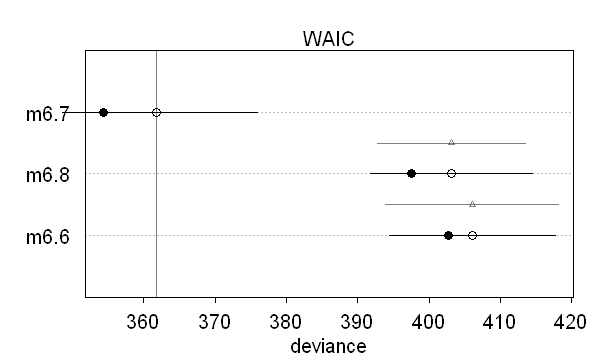

In [33]:
plot( compare( m6.6 , m6.7 , m6.8 ) ) 
options(repr.plot.width=3,repr.plot.height=5)

In [35]:
set.seed(92)
waic_m6.6 <- WAIC( m6.6 , pointwise=TRUE )
diff_m6.6_m6.8 <- waic_m6.6 - waic_m6.8
sqrt( n*var( diff_m6.6_m6.8 ) ) %>% round(2)

[1] 4.86

In [37]:
set.seed(93)
compare( m6.6 , m6.7 , m6.8 )@dSE %>% round(2)

,m6.6,m6.7,m6.8
m6.6,NA,12.20,4.93
m6.7,12.20,NA,10.43
m6.8,4.93,10.43,NA


### Something about Cebus

In [2]:
data(Primates301)
d <- Primates301

In [3]:
?Primates301

Warning message in file(out, "wt"):
"cannot open file 'C:\Users\bings\AppData\Local\Temp\Rtmpo3UQ1b\file29f83bf93e7a': No such file or directory"Warning message in file(con, "r"):
"cannot open file 'C:\Users\bings\AppData\Local\Temp\Rtmpo3UQ1b\file29f83bf93e7a': No such file or directory"ERROR while rich displaying an object: Error in file(con, "r"): cannot open the connection

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. r

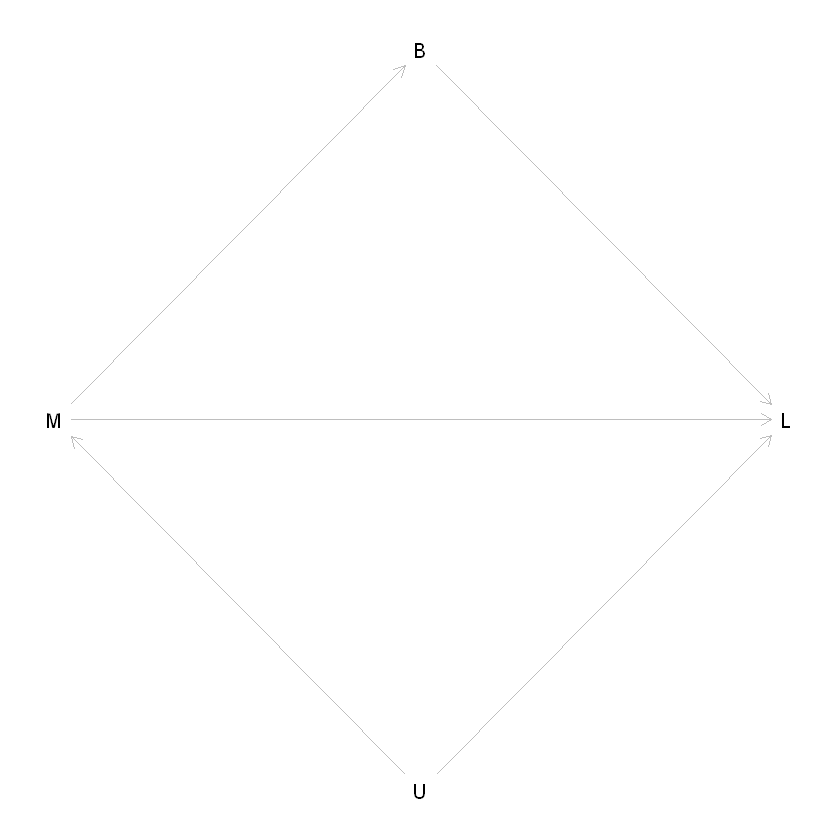

In [4]:
## R code 6.19
library(dagitty)
primate_dag <- dagitty( "dag {
    B -> L
    M -> L
    M -> B
    U -> M
    U -> L
}")
coordinates( primate_dag ) <- list( x=c(M=0, B=1, L=2, U=1) ,
                                  y=c(M=1, B=0, L=1, U=2) )
plot( primate_dag )

In [5]:
impliedConditionalIndependencies( primate_dag )

B _||_ U | M

In [ ]:
adjustmentSets( primate_dag , exposure="B" , outcome="L" )

In [6]:
adjustmentSets( primate_dag , exposure="M" , outcome="L" )

 { U }

In [7]:
## R code 7.34
d$log_L <- scale( log(d$longevity) )
d$log_B <- scale( log(d$brain) )
d$log_M <- scale( log(d$body) )

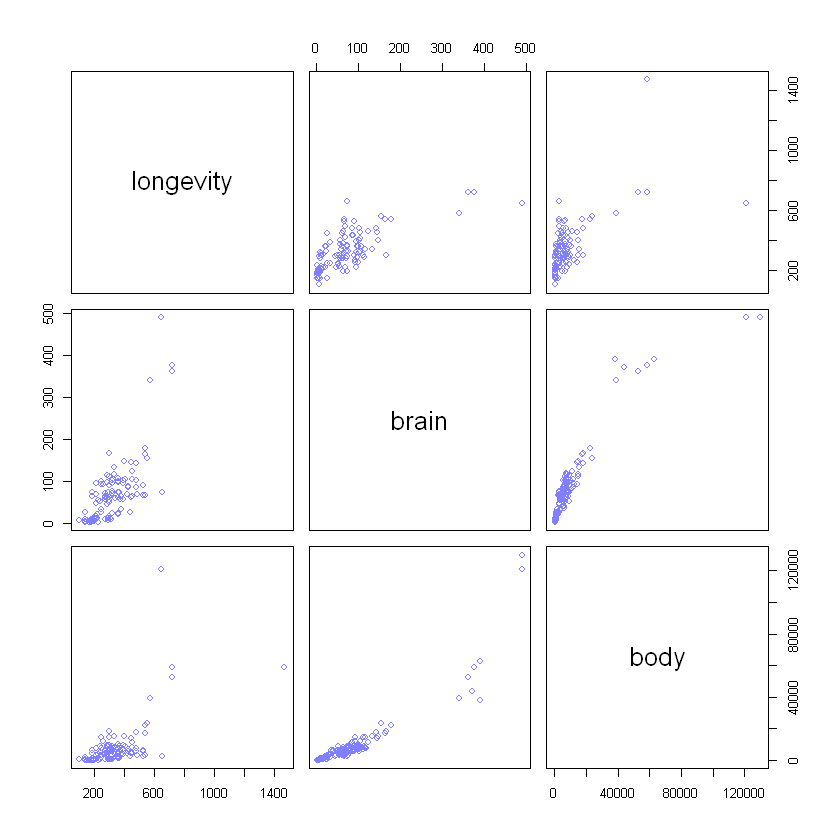

In [8]:
pairs( ~ longevity + brain + body , data=d , col=rangi2 ) 

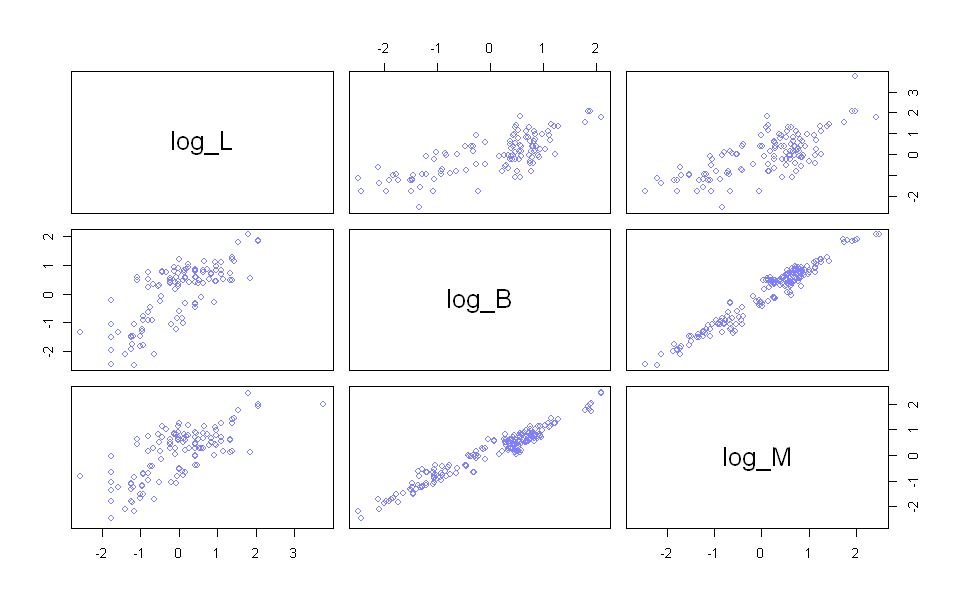

In [133]:
pairs( ~ log_L + log_B + log_M , data=d , col=rangi2 ) 

In [9]:
# check for missing values. 
sapply( d[,c("log_L","log_B","log_M")] , function(x) sum(is.na(x)) )

log_L log_B log_M 
  181   117    63

In [10]:
# select the cases with observed values for these three variables
## R code 7.36
d2 <- d[ complete.cases( d$log_L , d$log_M , d$log_B ) , ]
nrow(d2)

[1] 112

In [11]:
## R code 7.37
m7.8 <- quap(
    alist(
        log_L ~ dnorm( mu , sigma ),
        mu <- a + bM*log_M + bB*log_B,
        a ~ dnorm(0,0.1),
        bM ~ dnorm(0,0.5),
        bB ~ dnorm(0,0.5),
        sigma ~ dexp(1)
    ) , data=d2 )


Before inspecting the posterior, let’s also run two simpler models, each with just one of the
predictor variables. This will allow us to ask WAIC to evaluate the predictive accuracy of
each model.

In [12]:

## R code 7.38
m7.9 <- quap(
    alist(
        log_L ~ dnorm( mu , sigma ),
        mu <- a + bB*log_B,
        a ~ dnorm(0,0.1),
        bB ~ dnorm(0,0.5),
        sigma ~ dexp(1)
    ) , data=d2 )

m7.10 <- quap(
    alist(
        log_L ~ dnorm( mu , sigma ),
        mu <- a + bM*log_M,
        a ~ dnorm(0,0.1),
        bM ~ dnorm(0,0.5),
        sigma ~ dexp(1)
    ) , data=d2 )

So what does WAIC think of these models? Let’s use compare:

In [13]:
set.seed(301)
compare( m7.8 , m7.9 , m7.10 ) %>% round(1)

,WAIC,pWAIC,dWAIC,weight,SE,dSE
m7.8,216.2,3.5,0.0,0.5,14.7,NA
m7.9,216.5,2.6,0.3,0.5,14.8,1.5
m7.10,229.4,2.5,13.2,0.0,16.3,7.0


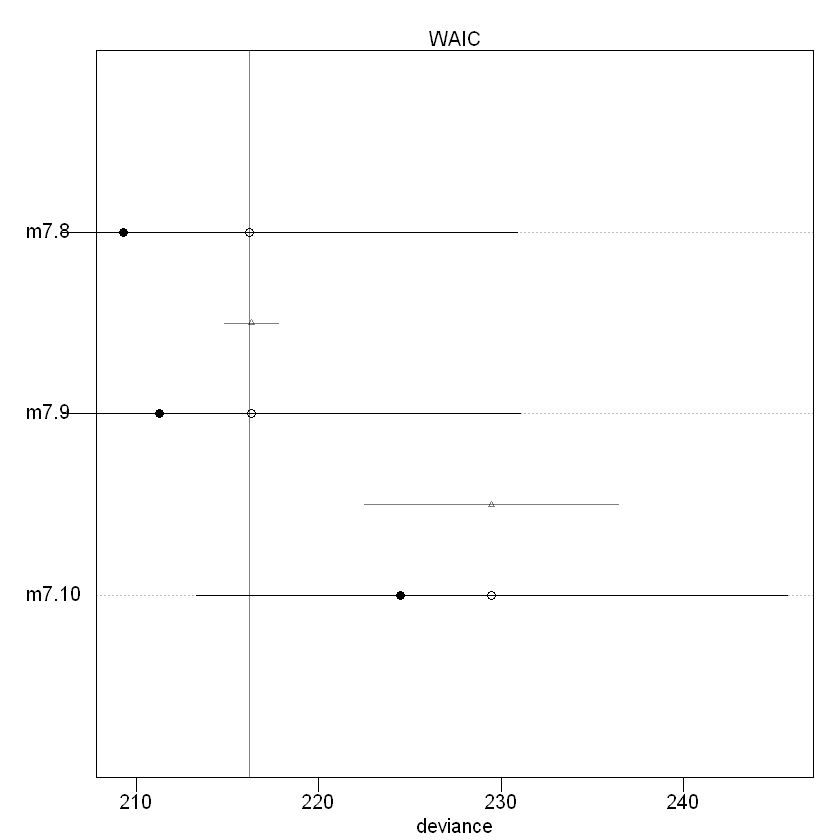

In [14]:
plot( compare( m7.8 , m7.9 , m7.10 ) )

options(repr.plot.width=6, repr.plot.height=3)

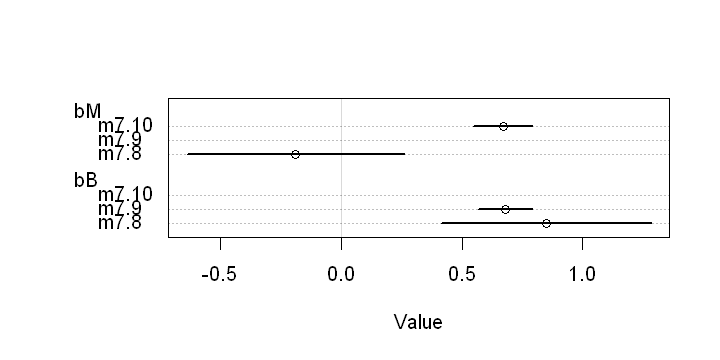

In [15]:
plot( coeftab( m7.8 , m7.9 , m7.10 ) , pars=c("bM","bB") )
options(repr.plot.width=6, repr.plot.height=4)

Notice that the posterior distributions of bB and bM are much wider in the model that contains both. This might remind you of the multicollinearity examples from Chapter 6. Indeed, the variables log_B and log_M are very highly correlated:

In [16]:
cor( d2$log_B , d2$log_M ) 

0.9796272


Brain size scales strongly with overall body size. But there is more going on here than just multicollinearity, because these variables are not substitutes for one another. 

* Models m7.9 and m7.10 demonstrate that, and brain volume remains strongly associated, even after adding body mass. And body mass has flipped to mostly negative, in the presence of brain volume. 

* If we had used flat priors, we’d have gotten an even more negative posterior for body mass, just as you’d get if you slummed it with a non-Bayesian regression. 

**<font color = 'purple' style='background-color: lightyellow'>What is going on here? </font>** Are we to believe that, controlling for brain size, larger primates actually have somewhat shorter lifespans? The same partial regression result has been found for general in mammals, not just in primates.

In [17]:
waic_m7.8 <- WAIC( m7.8 , pointwise=TRUE )
waic_m7.9 <- WAIC( m7.9 , pointwise=TRUE )

Inspect the contents, str(waic_m7.8), and you’ll see 112 WAIC values, one for each species, as well as 112 lppd and penalty values. We want to see which species each model does better at. So let’s plot the pointwise differences. 
* I’ll show these differences against the outcome variable, log_L. 


* I’ll also scale each point by the difference in the z-scores of two predictor variables. This will turn out to be helpful, you’ll see.

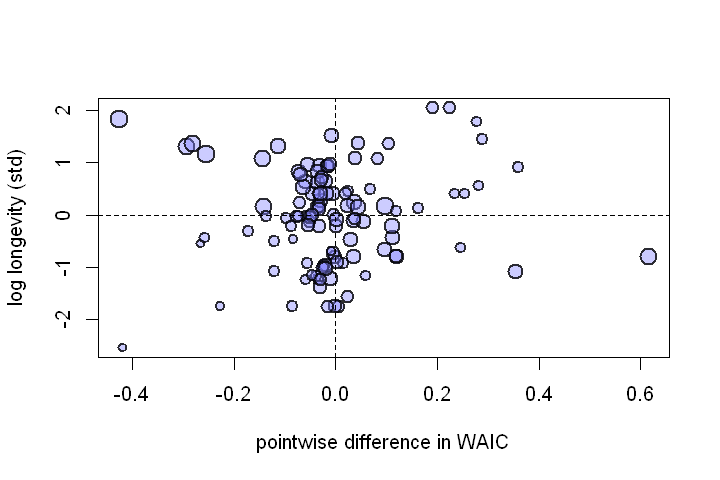

In [18]:
## R code 7.44
# compute point scaling
x <- d2$log_B - d2$log_M
x <- x - min(x)
x <- x / max(x)

# draw the plot
plot( waic_m7.8 - waic_m7.9 , d2$log_L ,
    xlab="pointwise difference in WAIC" , ylab="log longevity (std)" , pch=21 ,
    col=col.alpha("black",0.8) , cex=1+x , lwd=2 , bg=col.alpha(rangi2,0.4) )
abline( v=0 , lty=2 )
abline( h=0 , lty=2 )

options(repr.plot.width=8, repr.plot.height=5) 

In [19]:
## R code 7.45
m7.11 <- quap(
    alist(
        log_B ~ dnorm( mu , sigma ),
        mu <- a + bM*log_M + bL*log_L,
        a ~ dnorm(0,0.1),
        bM ~ dnorm(0,0.5),
        bL ~ dnorm(0,0.5),
        sigma ~ dexp(1)
    ) , data=d2 )
precis( m7.11 ) %>% round(2)

,mean,sd,5.5%,94.5%
a,-0.05,0.02,-0.07,-0.02
bM,0.94,0.03,0.90,0.98
bL,0.12,0.03,0.07,0.16
sigma,0.19,0.01,0.17,0.21


### 7.2.5. Scoring the right data

In [3]:
sim_train_test

function (N = 20, k = 3, rho = c(0.15, -0.4), b_sigma = 100, 
    WAIC = FALSE, LOOCV = FALSE, LOOIC = FALSE, cv.cores = 1, 
    return_model = FALSE) 
{
    n_dim <- 1 + length(rho)
    if (n_dim < k) 
        n_dim <- k
    Rho <- diag(n_dim)
    for (i in 1:length(rho)) {
        Rho[1, i + 1] <- rho[i]
    }
    Rho[lower.tri(Rho)] <- Rho[upper.tri(Rho)]
    X.train <- mvrnorm(n = N, mu = rep(0, n_dim), Sigma = Rho)
    X.test <- mvrnorm(n = N, mu = rep(0, n_dim), Sigma = Rho)
    mm.train <- matrix(1, nrow = N, ncol = 1)
    bnames <- "a"
    if (k > 1) {
        mm.train <- cbind(mm.train, X.train[, 2:k])
        bnames <- c("a", paste("b", 1:(k - 1), sep = ""))
        pnames <- paste("b", 1:(k - 1), sep = "")
        P <- paste("c(", paste(pnames, collapse = ","), ")", 
            sep = "", collapse = "")
        Pf <- paste(P, "~ dnorm(0,", b_sigma, ")")
    }
    B <- paste("c(", paste(bnames, collapse = ","), ")", sep = "", 
        collapse = "")
    d <- list(y = X.train[, 1], mm = mm.train, Bvec = B)
    flist <- list(y ~ dnorm(mu, 1), mu ~ 0 + mm %*% eval(parse(text = Bvec)))
    start.list <- list(a = 0)
    if (k > 1) {
        flist[[3]] <- eval(parse(text = Pf))
        for (i in 2:k) {
            ptext <- paste("b", i - 1, sep = "", collapse = "")
            start.list[[i]] <- 0
            names(start.list)[i] <- ptext
        }
    }
    m <- quap(flist, data = d, start = start.list)
    dev.train <- (-2) * sum(lppd(m))
    mm.test <- matrix(1, nrow = N, ncol = 1)
    if (k > 1) 
        mm.test <- cbind(mm.test, X.test[, 2:k])
    d_test <- list(y = X.test[, 1], mm = mm.test, Bvec = B)
    dev.test <- (-2) * sum(lppd(m, data = d_test))
    result <- c(dev.train, dev.test)
    if (WAIC == TRUE) {
        wx <- WAIC(m)
        result <- c(result, wx, abs(wx - dev.test))
    }
    if (LOOIC == TRUE) {
        lx <- LOO(m)
        result <- c(result, lx, abs(lx - dev.test))
    }
    if (LOOCV == TRUE) {
        cvx <- (-2) * cv_quap(m, start = start.list, cores = cv.cores)
        result <- c(result, cvx, abs(cvx - dev.test))
    }
    if (return_model == TRUE) {
        result <- list(model = m, result = result)
    }
    return(result)
}
<bytecode: 0x000000003acbeeb0>
<environment: namespace:rethinking>

In [11]:
help(mvrnorm)

## Practice Problems

In [2]:
# define probabilities of heads and tails
p <- c( 0.7 , 0.3 )

# compute entropy
-sum( p*log(p) )

[1] 0.6108643

In [5]:
p*log(p) 

[1] -0.2496725 -0.3611918

In [6]:
# define probabilities of sides
p <- c( 0.2 , 0.25 , 0.25 , 0.3 )

# compute entropy
-sum( p*log(p) )

[1] 1.376227

In [9]:
# define probabilities of sides
p <- c( 1/3 , 1/3 , 1/3 )

# compute entropy
-sum( p*log(p) )

[1] 1.098612

# MISC

##### rough

In [1]:
## R code 7.13
p <- c( 0.7 , 0.15 , 0.15)
-sum( p*log(p) )

## R code 7.1
sppnames <- c( "afarensis","africanus","habilis","boisei",
    "rudolfensis","ergaster","sapiens")
brainvolcc <- c( 438 , 452 , 612, 521, 752, 871, 1350 )
masskg <- c( 37.0 , 35.5 , 34.5 , 41.5 , 55.5 , 61.0 , 53.5 )
d <- data.frame( species=sppnames , brain=brainvolcc , mass=masskg )

## R code 7.2
d$mass_std <- (d$mass - mean(d$mass))/sd(d$mass)
d$brain_std <- d$brain / max(d$brain)

## R code 7.3
m7.1 <- quap(
    alist(
        brain_std ~ dnorm( mu , exp(log_sigma) ),
        mu <- a + b*mass_std,
        a ~ dnorm( 0.5 , 1 ),
        b ~ dnorm( 0 , 10 ),
        log_sigma ~ dnorm( 0 , 1 )
    ), data=d )

## R code 7.15
set.seed(1)
logprob <- sim( m7.1 , ll=TRUE , n=1e4 )
n <- ncol(logprob)
ns <- nrow(logprob)
f <- function( i ){
    log_sum_exp( logprob[,i] ) - log(ns)( lppd <- sapply( 1:n , f ) )
}



## R code 7.20
data(cars)
m <- quap(
    alist(
        dist ~ dnorm(mu,sigma),
        mu <- a + b*speed,
        a ~ dnorm(0,100),
        b ~ dnorm(0,10),
        sigma ~ dexp(1)
    ) , data=cars )
set.seed(94)
post <- extract.samples(m,n=1000)

## R code 7.21
n_samples <- 1000
logprob <- sapply( 1:n_samples ,
    function(s) {
        mu <- post$a[s] + post$b[s]*cars$speed
        dnorm( cars$dist , mu , post$sigma[s] , log=TRUE )
    } )


logprob %>% head()

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.8
v tidyr   0.8.2     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter()  masks stats::filter()
x purrr::flatten() masks jsonlite::flatten()
x dplyr::lag()     masks stats::lag()
Loading required package: rstan
Loading required package: StanHeaders
rstan (Version 2.18.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For improved execution time, we recommend calling
Sys.setenv(LOCAL_CPPFLAGS = '-march=native')
although this causes Stan to throw an error on a few processors.

Attaching package: 'rstan'

The following object is masked from 'pa

##### anonymous functions

In [15]:
(function(x) x + 3)(10)
 
 (function(x) x + 3)(1)

[1] 13

[1] 4

## Notation

average log-probability: E log(qi)

## vocab

<span style='background-color: lightgreen'>log probability</span> is simply the logarithm of a probability